In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Dataset Loading

In [19]:
df = pd.read_excel("./data/Ogundoyin_Jan_2022.xlsx")

In [20]:
df.head()

,DATE OF SPECIMEN COLLECTION,DATE WHEN SPECIMEN TESTED,AGE (YR),SEX,NEW/FU/R,STATE,LGA,VILLAGE/TOWN,SYMPTOMATIC,DATE ONSET,...,CARDIOVASCULAR,CHRONIC RENAL DISEASE,CHRNIC LIVER DISEASE,IMMUNOCOMPROMISED CONDITION,NEUROLOGIC/NEURODEVELOPMENT,OTHER CHRONIC CONDITION,"IF FEMALE, CURRENTLY PREGNANT",CURRENT SMOKER,FORMER SMOKER,"FINAL RESULT INTERPRETATION. (POSITIVE, NEGATIVE, OR DISCARDED)"
0,2020-09-24 00:00:00,2020-09-28 00:00:00,48,F,NEW,OSUN,IFE CENTRAL,IFE,NO,2020-09-16 00:00:00,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVE
1,2020-09-24 00:00:00,2020-09-28 00:00:00,16,M,NEW,OSUN,IFE- CENTRAL,IFE,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVE
2,2020-09-24 00:00:00,2020-09-28 00:00:00,63,F,FOLLOW-UP,OSUN,IFE CENTRAL,IFE,YES,2020-09-11 00:00:00,...,YES,NO,NO,NO,NO,NO,NO,NO,NO,POSITIVE
3,2020-09-25 00:00:00,2020-09-28 00:00:00,39,M,FOLLOW-UP,OSUN,OSOGBO,OSOGBO,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVE
4,2020-09-25 00:00:00,2020-09-28 00:00:00,40,F,NEW,OSUN,IFELODUN,OBAAGUN,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVE


### Feature Exploration, Engineering and Cleaning

#### Relevant fields selection

In [22]:
# select relevant datafields
relevant = ["AGE (YR)", "SEX" ,"SYMPTOMATIC", "COMMENTS(TRAVEL HISTORY)", "COMMENTS (CONTACT)", "FEVER (DEGREE CELCIOUS)", "SUBJECTIVE FEVER (felt feverish)", "CHILLS", "MUSCLE ACHES (MYALGIA)", "RUNNY NOSE", "SORE THROAT", "COUGH", "SHORTNESS OF BREATH", "NAUSEA", "HEADACHE", "ABDOMINAL PAIN", "DIARRHEA", "CHRONI LUNG DISEASE", "DIABETES MELLITUS", "CARDIOVASCULAR", "CHRONIC RENAL DISEASE", "CHRNIC LIVER DISEASE", "IMMUNOCOMPROMISED CONDITION", "NEUROLOGIC/NEURODEVELOPMENT", "OTHER CHRONIC CONDITION", "IF FEMALE, CURRENTLY PREGNANT", "CURRENT SMOKER", "FORMER SMOKER", "FINAL RESULT INTERPRETATION. (POSITIVE, NEGATIVE, OR DISCARDED)"]
df = df[relevant]


#### Drop fields with missing values

In [23]:
df.shape

(3423, 29)

In [24]:
df.dropna(inplace=True)

In [25]:
df.shape

(784, 29)

#### Field renaming

In [26]:
# rename variables
field_names = {
    "AGE (YR)": "Age",
    "SEX": "Sex",
    "SYMPTOMATIC": "Symptomatic",
    "COMMENTS(TRAVEL HISTORY)": "Travel_History",
    "COMMENTS (CONTACT)": "Contact_With_Infected", 
    "FEVER (DEGREE CELCIOUS)": "Fever", 
    "SUBJECTIVE FEVER (felt feverish)": "Subjective_Fever", 
    "CHILLS": "Chills", 
    "MUSCLE ACHES (MYALGIA)": "Muscle_Ache", 
    "RUNNY NOSE": "Runny_Nose", 
    "SORE THROAT": "Sore_throat", 
    "COUGH": "Cough", 
    "SHORTNESS OF BREATH": "Shortness_Of_Breath", 
    "NAUSEA": "Nausea", 
    "HEADACHE": "Headache", 
    "ABDOMINAL PAIN": "Abdominal_Pain", 
    "DIARRHEA": "Diarrhea", 
    "CHRONI LUNG DISEASE": "Chronic_Lung_Disease", 
    "DIABETES MELLITUS": "Diabetes_Mellitus", 
    "CARDIOVASCULAR": "Cardiovascular", 
    "CHRONIC RENAL DISEASE": "Chronic_Renal_Disease", 
    "CHRNIC LIVER DISEASE": "Chronic_Liver_Disease", 
    "IMMUNOCOMPROMISED CONDITION": "Immunocompromised_Condition", 
    "NEUROLOGIC/NEURODEVELOPMENT": "Neurological_Neurodevelopment", 
    "OTHER CHRONIC CONDITION": "Other_Chronic_Condition", 
    "IF FEMALE, CURRENTLY PREGNANT": "Is_Currently_Pregrant_Female", 
    "CURRENT SMOKER": "Current_Smoker", 
    "FORMER SMOKER": "Former_Smoker", 
    "SYMPTOMATIC": "Symptomatic",
    "FINAL RESULT INTERPRETATION. (POSITIVE, NEGATIVE, OR DISCARDED)": "Outcome"     
}
df.rename(columns=field_names, inplace=True)

In [27]:
df.head()

,Age,Sex,Symptomatic,Travel_History,Contact_With_Infected,Fever,Subjective_Fever,Chills,Muscle_Ache,Runny_Nose,...,Cardiovascular,Chronic_Renal_Disease,Chronic_Liver_Disease,Immunocompromised_Condition,Neurological_Neurodevelopment,Other_Chronic_Condition,Is_Currently_Pregrant_Female,Current_Smoker,Former_Smoker,Outcome
0,48,F,NO,NO,NO,NO,YES,NO,YES,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVE
1,16,M,NO,NO,NO,YES,YES,NO,NO,YES,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVE
2,63,F,YES,NO,NO,NO,NO,NO,NO,NO,...,YES,NO,NO,NO,NO,NO,NO,NO,NO,POSITIVE
3,39,M,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVE
4,40,F,NO,NO,NO,36.5,NO,NO,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVE


#### Label Encoding

In [28]:
numeric_labels = {
    "Sex": {"F": 0, "M":1},
    "Travel_History": {"NO": 0, "YES":1},
    "Symptomatic": {"NO": 0, "YES": 1},
    "Contact_With_Infected": {"NO": 0, "YES":1}, 
    "Fever": {"NO": 0, "YES":1}, 
    "Subjective_Fever": {"NO": 0, "YES":1},
    "Chills": {"NO": 0, "YES":1},
    "Muscle_Ache": {"NO": 0, "YES":1}, 
    "Runny_Nose": {"NO": 0, "YES":1}, 
    "Sore_throat": {"NO": 0, "YES":1}, 
    "Cough": {"NO": 0, "YES":1}, 
    "Shortness_Of_Breath": {"NO": 0, "YES":1}, 
    "Nausea": {"NO": 0, "YES":1}, 
    "Headache": {"NO": 0, "YES":1}, 
    "Abdominal_Pain": {"NO": 0, "YES":1}, 
    "Diarrhea": {"NO": 0, "YES":1}, 
    "Chronic_Lung_Disease": {"NO": 0, "YES":1}, 
    "Diabetes_Mellitus": {"NO": 0, "YES":1}, 
    "Cardiovascular": {"NO": 0, "YES":1}, 
    "Chronic_Renal_Disease": {"NO": 0, "YES":1}, 
    "Chronic_Liver_Disease": {"NO": 0, "YES":1}, 
    "Immunocompromised_Condition": {"NO": 0, "YES":1}, 
    "Neurological_Neurodevelopment": {"NO": 0, "YES":1}, 
    "Other_Chronic_Condition": {"NO": 0, "YES":1}, 
    "Is_Currently_Pregrant_Female": {"NO": 0, "YES":1}, 
    "Current_Smoker": {"NO": 0, "YES":1}, 
    "Former_Smoker": {"NO": 0, "YES":1}, 
    "Outcome": {"NEGATIVE": 0, "POSITIVE":1}  
}
df = df.replace(numeric_labels)

In [29]:
df.head()

,Age,Sex,Symptomatic,Travel_History,Contact_With_Infected,Fever,Subjective_Fever,Chills,Muscle_Ache,Runny_Nose,...,Cardiovascular,Chronic_Renal_Disease,Chronic_Liver_Disease,Immunocompromised_Condition,Neurological_Neurodevelopment,Other_Chronic_Condition,Is_Currently_Pregrant_Female,Current_Smoker,Former_Smoker,Outcome
0,48,0,0,0,0,0.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,16,1,0,0,0,1.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,63,0,1,0,0,0.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,39,1,0,0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,40,0,0,0,0,36.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Correlation Analysis

In [30]:
ca = df.corr(method="pearson")

In [31]:
ca

,Sex,Travel_History,Contact_With_Infected,Fever,Subjective_Fever,Chills,Muscle_Ache,Runny_Nose,Sore_throat,Cough,...,Cardiovascular,Chronic_Renal_Disease,Chronic_Liver_Disease,Immunocompromised_Condition,Neurological_Neurodevelopment,Other_Chronic_Condition,Is_Currently_Pregrant_Female,Current_Smoker,Former_Smoker,Outcome
Sex,1.000000,NaN,NaN,-0.006472,5.413469e-02,0.045047,-0.028499,-0.007541,0.037249,-0.064732,...,-0.060883,-0.016412,NaN,0.025974,NaN,NaN,NaN,NaN,NaN,-9.838178e-02
Travel_History,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contact_With_Infected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fever,-0.006472,NaN,NaN,1.000000,2.199250e-01,0.025149,0.066480,0.238908,0.155350,0.238009,...,0.010340,0.039878,NaN,0.073468,NaN,NaN,NaN,NaN,NaN,-2.531501e-02
Subjective_Fever,0.054135,NaN,NaN,0.219925,1.000000e+00,0.245628,0.257388,0.436214,0.216243,0.255176,...,-0.011880,0.148222,NaN,-0.005929,NaN,NaN,NaN,NaN,NaN,-1.686674e-17
Chills,0.045047,NaN,NaN,0.025149,2.456283e-01,1.000000,0.231621,0.124578,0.147641,0.095329,...,-0.004438,-0.003134,NaN,-0.002215,NaN,NaN,NaN,NaN,NaN,-3.919811e-02
Muscle_Ache,-0.028499,NaN,NaN,0.066480,2.573877e-01,0.231621,1.000000,0.176519,0.209199,0.211372,...,-0.006289,-0.004441,NaN,-0.003138,NaN,NaN,NaN,NaN,NaN,9.256879e-03
Runny_Nose,-0.007541,NaN,NaN,0.238908,4.362135e-01,0.124578,0.176519,1.000000,0.166647,0.400941,...,-0.011286,0.156463,NaN,-0.005632,NaN,NaN,NaN,NaN,NaN,-2.622965e-02
Sore_throat,0.037249,NaN,NaN,0.155350,2.162434e-01,0.147641,0.209199,0.166647,1.000000,0.224136,...,-0.009656,-0.006819,NaN,-0.004819,NaN,NaN,NaN,NaN,NaN,2.132007e-02
Cough,-0.064732,NaN,NaN,0.238009,2.551757e-01,0.095329,0.211372,0.400941,0.224136,1.000000,...,0.172363,0.121723,NaN,0.179161,NaN,NaN,NaN,NaN,NaN,-2.312844e-02


In [36]:
df.head()

,Age,Sex,Symptomatic,Travel_History,Contact_With_Infected,Fever,Subjective_Fever,Chills,Muscle_Ache,Runny_Nose,...,Cardiovascular,Chronic_Renal_Disease,Chronic_Liver_Disease,Immunocompromised_Condition,Neurological_Neurodevelopment,Other_Chronic_Condition,Is_Currently_Pregrant_Female,Current_Smoker,Former_Smoker,Outcome
0,48,0,0,0,0,0.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,16,1,0,0,0,1.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,63,0,1,0,0,0.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,39,1,0,0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,40,0,0,0,0,36.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# df.to_excel("./data/rem3+.xlsx")
df = pd.read_excel("./data/rem3+.xlsx")

<AxesSubplot:title={'center':'Pearson correlation of features'}>

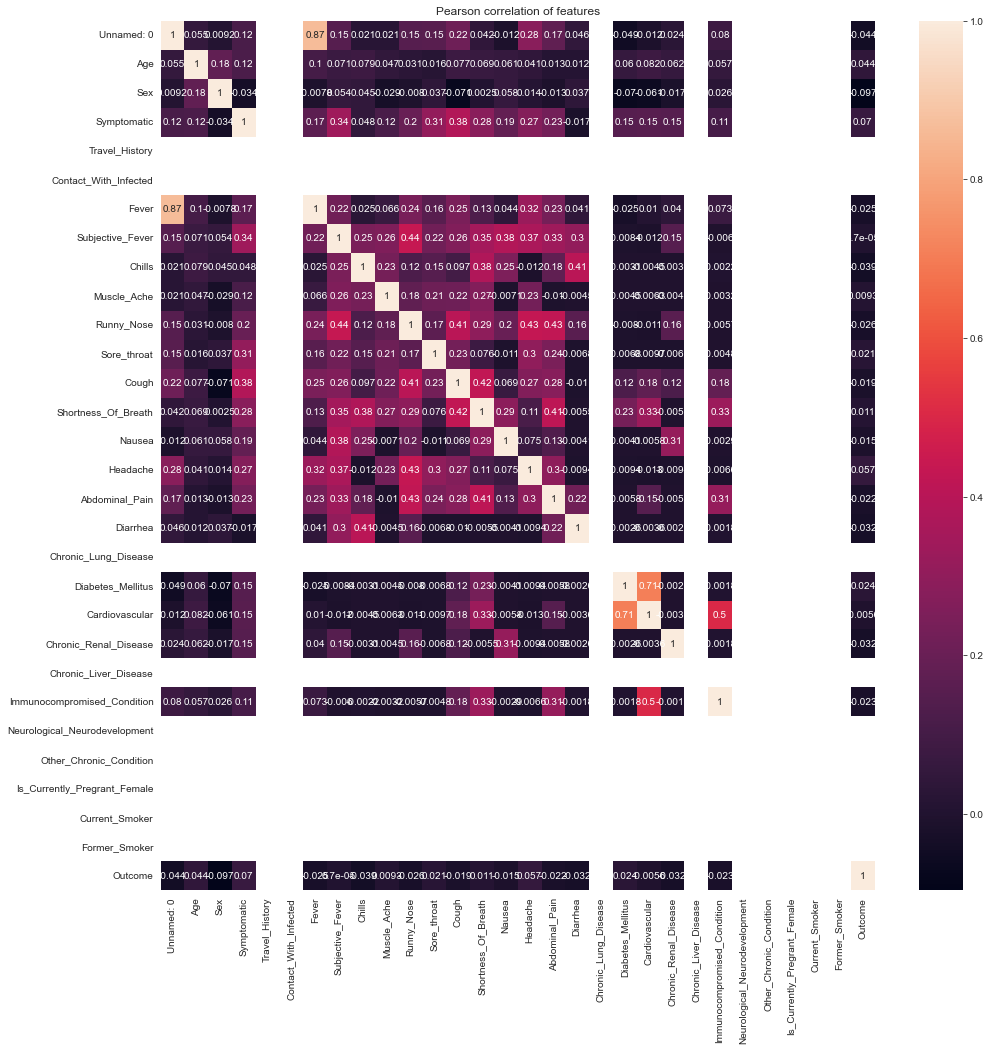

In [40]:
colormap = plt.cm.RdBu
plt.figure(figsize=(16,16))
plt.title('Pearson correlation of features')
sns.heatmap(df.astype(float).corr(), annot=True)

KeyboardInterrupt: 

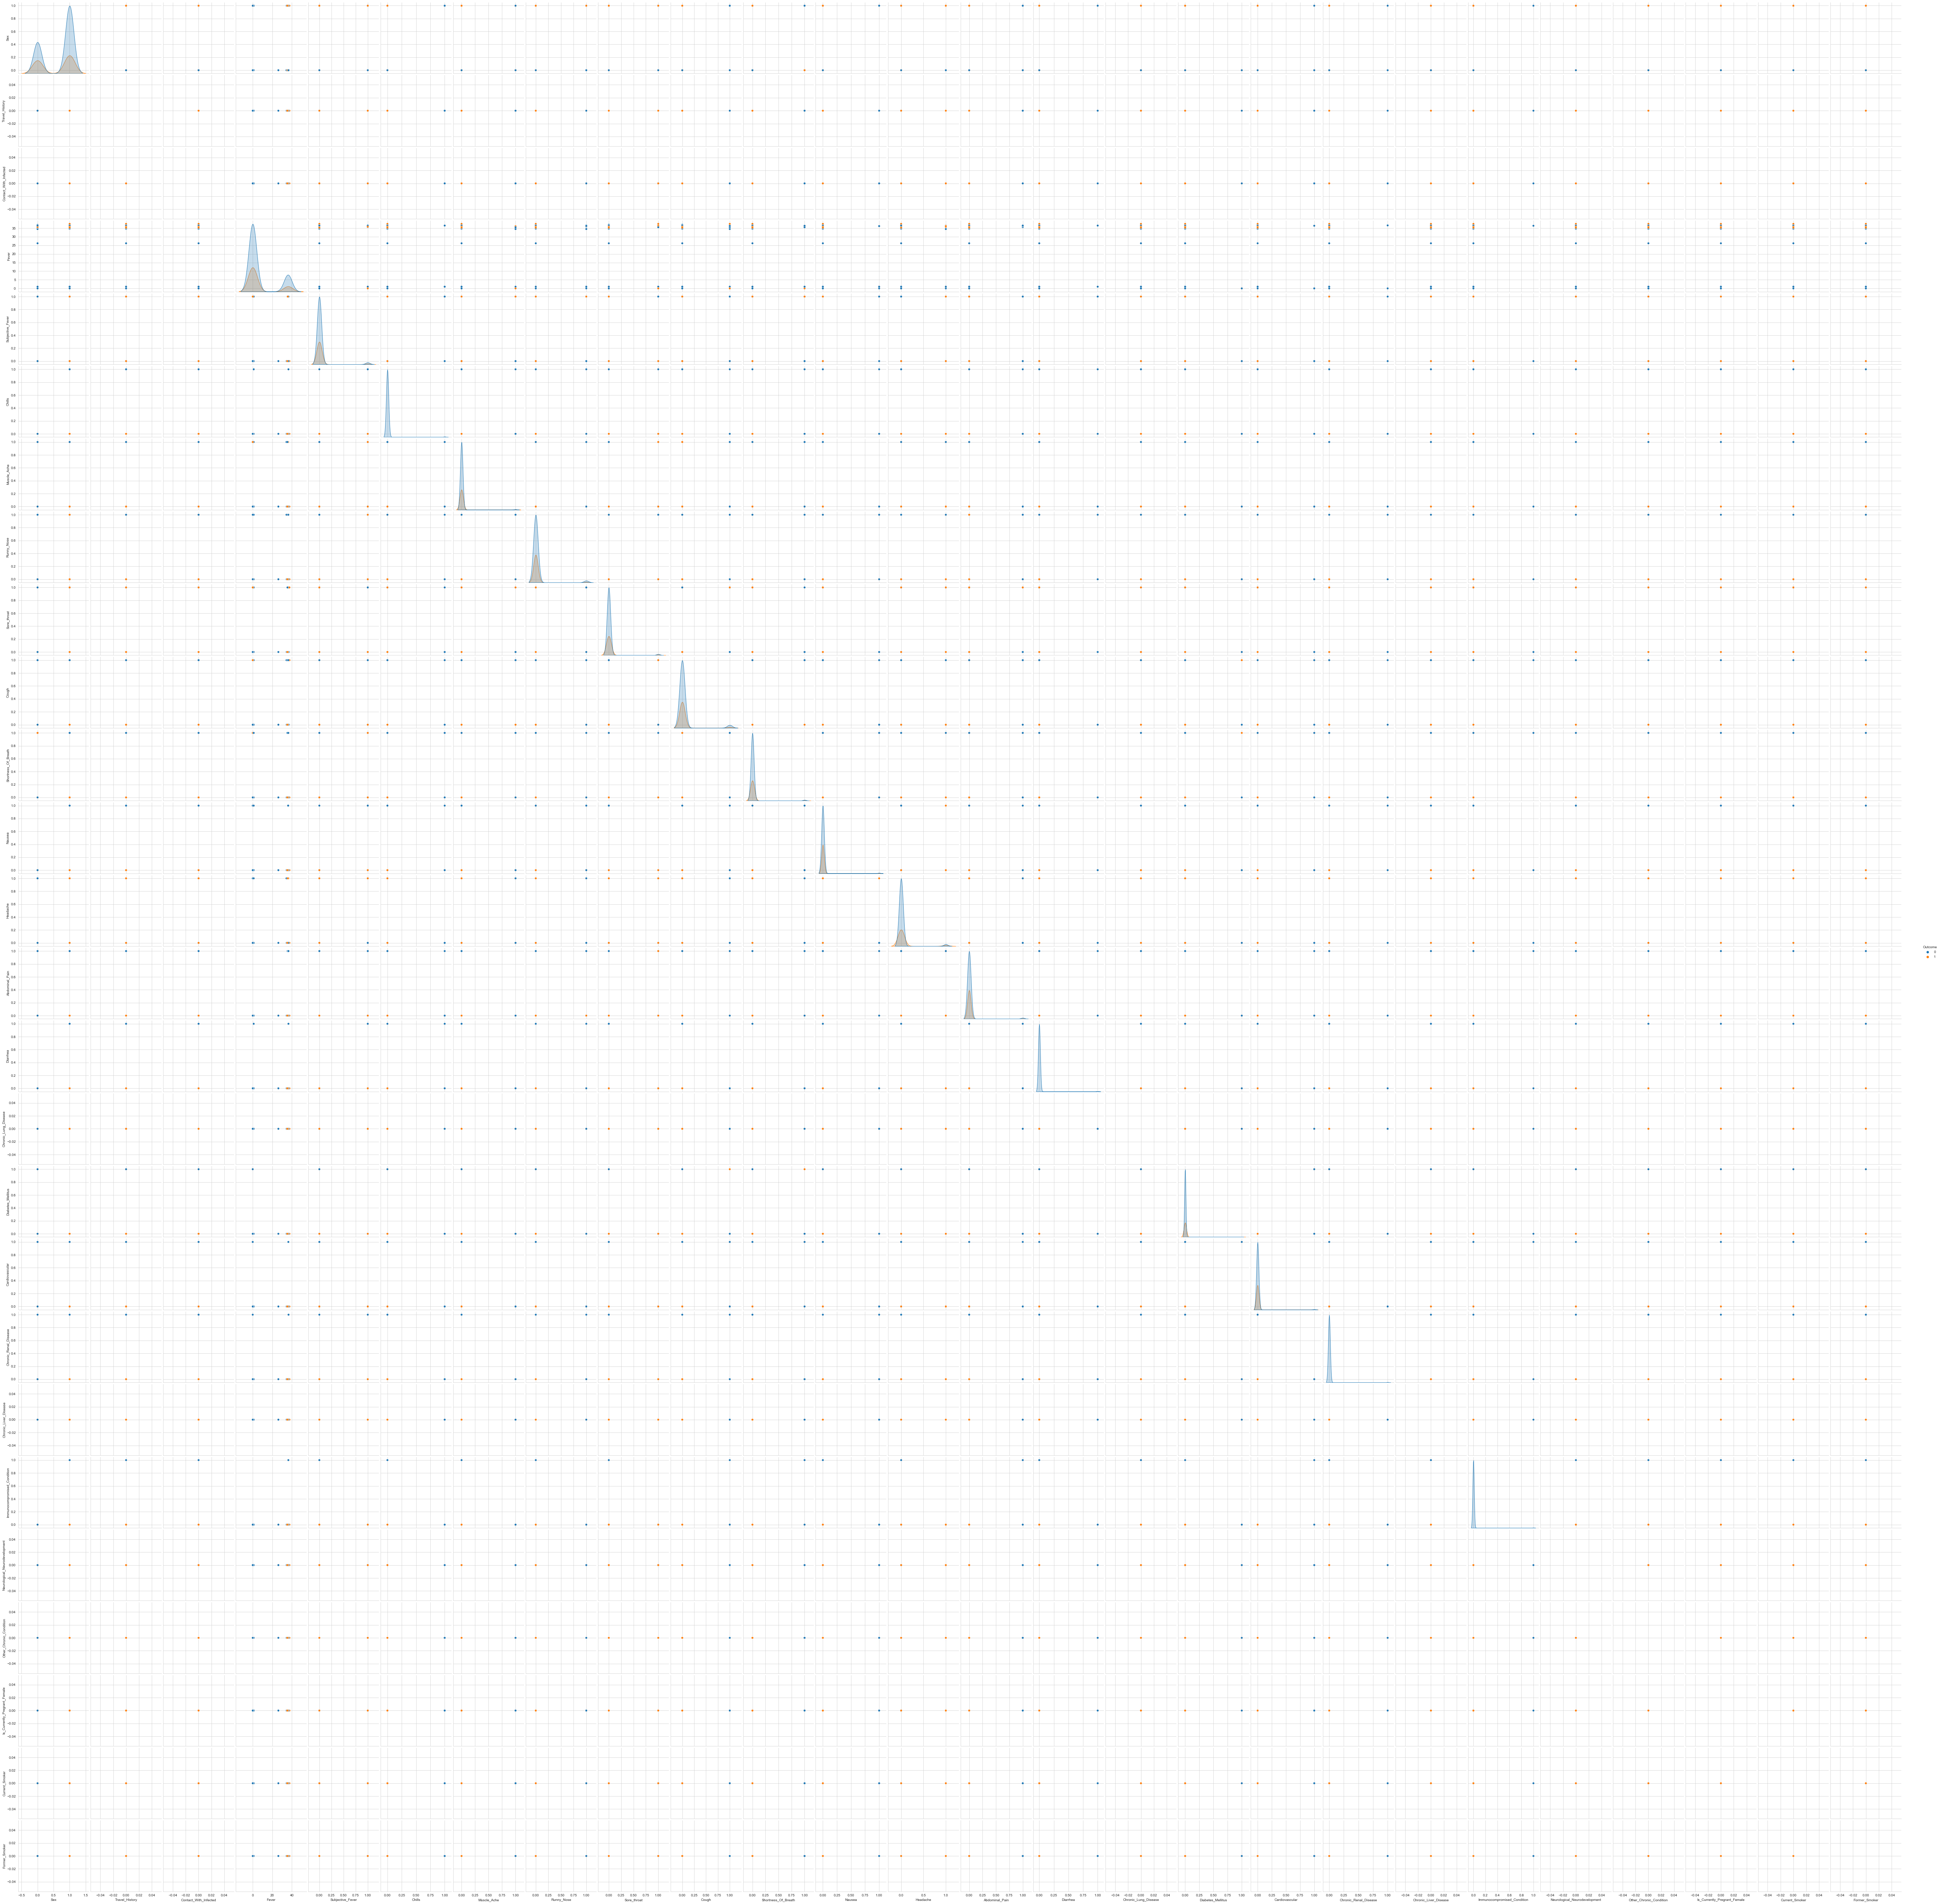

In [32]:
plt.close();

sns.set_style("whitegrid");

sns.pairplot(df, hue="Outcome", height=3);

plt.savefig("all_var_correlation_plot.png", dpi=300, bbox_inches="tight")
plt.show()

Correlation analysis identifies Age, Sex, Symptomatic as key predictors.

C:\Users\Jenyo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jenyo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


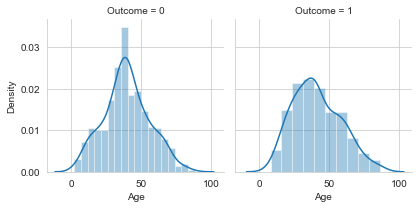

In [41]:
# Age/Outcome columns comparison
graph = sns.FacetGrid(df, col="Outcome")
graph.map(sns.distplot, "Age")

C:\Users\Jenyo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jenyo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


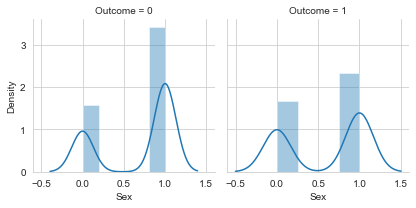

In [42]:
# Sex/Outcome columns comparison
graph = sns.FacetGrid(df, col="Outcome")
graph.map(sns.distplot, "Sex")

C:\Users\Jenyo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jenyo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


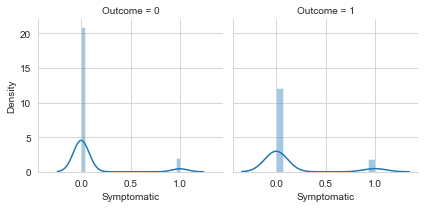

In [43]:
# Symptomatic/outcome columns comparison
graph = sns.FacetGrid(df, col="Outcome")
graph.map(sns.distplot, "Symptomatic")

#### Field Selection

In [44]:
df = df[["Age", "Sex", "Symptomatic", "Outcome"]]

In [45]:
independents = df.drop(columns=["Outcome"])
target = df[["Outcome"]]

#### Check data balance

In [47]:
target.value_counts()

Outcome
0          558
1          223
dtype: int64

In [17]:
df.shape

(3423, 29)

In [55]:
independents.head(5)

,Age,Sex,Symptomatic
0,48,0,0
1,16,1,0
2,63,0,1
3,39,1,0
4,40,0,0


In [56]:
independents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          1116 non-null   int64
 1   Sex          1116 non-null   int64
 2   Symptomatic  1116 non-null   int64
dtypes: int64(3)
memory usage: 26.3 KB


In [57]:
independents.dtypes

Age            int64
Sex            int64
Symptomatic    int64
dtype: object

In [58]:
independents.describe

<bound method NDFrame.describe of       Age  Sex  Symptomatic
0      48    0            0
1      16    1            0
2      63    0            1
3      39    1            0
4      40    0            0
...   ...  ...          ...
1111   43    1            0
1112   43    0            0
1113   42    1            0
1114   59    1            0
1115   55    1            0

[1116 rows x 3 columns]>

In [59]:
# Checking the number of rows having null values
independents[independents.columns[independents.isnull().any()]].isnull().sum()

Series([], dtype: float64)

#### Handle data imbalance with random oversampling

In [48]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variablex_ros, y_ros = ros.fit_resample(x, y)
independents, target = ros.fit_resample(independents, target)



#### Split train/test data

In [54]:
X_train, X_test, y_train, y_test = train_test_split(independents, target, test_size=0.2, random_state=42)

### Machine learning models

In [66]:
# importing machine learning models for prediction
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# importing voting classifier
from sklearn.ensemble import VotingClassifier

#importing evaluation metrics
from sklearn.metrics import log_loss


In [75]:

# Confusion matrix label
group_names = ['True Neg','False Pos','False Neg','True Pos']

#### Initializing ML Models

In [65]:
model_1 = svm.SVC()
model_2 = tree.DecisionTreeClassifier()
model_3 = RandomForestClassifier(max_depth=2, random_state=0)

#### Model_1 SVM

In [74]:
# SVM model
model_1.fit(X_train, y_train)
svm_pred = model_1.predict(X_test)
print(log_loss(y_test, svm_pred))

C:\Users\Jenyo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


16.035914013536445


##### SVM Metrics

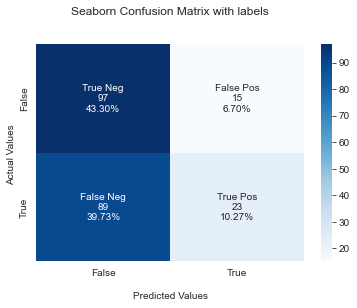

Classification Report: 
              precision    recall  f1-score   support

           0       0.52      0.87      0.65       112
           1       0.61      0.21      0.31       112

    accuracy                           0.54       224
   macro avg       0.56      0.54      0.48       224
weighted avg       0.56      0.54      0.48       224

Accuracy:  0.5357142857142857


In [76]:
svm_result = confusion_matrix(y_test, svm_pred)
group_counts = ["{0:0.0f}".format(value) for value in svm_result.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     svm_result.flatten()/np.sum(svm_result)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(svm_result, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


svm_result1 = classification_report(y_test, svm_pred)
print("Classification Report: ")
print(svm_result1)

svm_result2 = accuracy_score(y_test, svm_pred)
print("Accuracy: ", svm_result2)

#### Model_2 Decision Tree

In [77]:
# Decision Tree Model
model_2.fit(X_train, y_train)
dt_pred = model_2.predict(X_test)
print(log_loss(y_test, dt_pred))

13.260583713601237


##### Decision Tree Metrics

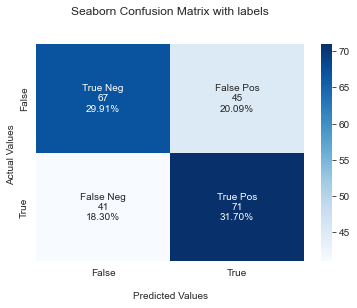

Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.60      0.61       112
           1       0.61      0.63      0.62       112

    accuracy                           0.62       224
   macro avg       0.62      0.62      0.62       224
weighted avg       0.62      0.62      0.62       224

Accuracy:  0.6160714285714286


In [78]:
dt_result = confusion_matrix(y_test, dt_pred)
group_counts = ["{0:0.0f}".format(value) for value in dt_result.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     dt_result.flatten()/np.sum(dt_result)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(dt_result, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


dt_result1 = classification_report(y_test, dt_pred)
print("Classification Report: ")
print(dt_result1)

dt_result2 = accuracy_score(y_test, dt_pred)
print("Accuracy: ", dt_result2)

#### Model_3 Random Forest

In [79]:
# Random Forest Model
model_3.fit(X_train, y_train)
rf_pred = model_3.predict(X_test)
print(log_loss(y_test, rf_pred))

C:\Users\Jenyo\AppData\Local\Temp/ipykernel_12156/2130110201.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_3.fit(X_train, y_train)


15.88182299716651


##### Random Forest Metrics

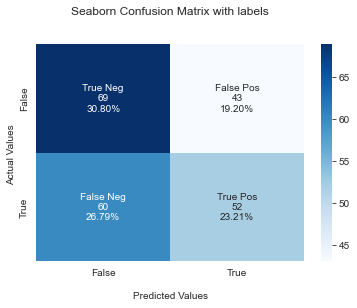

Classification Report: 
              precision    recall  f1-score   support

           0       0.53      0.62      0.57       112
           1       0.55      0.46      0.50       112

    accuracy                           0.54       224
   macro avg       0.54      0.54      0.54       224
weighted avg       0.54      0.54      0.54       224

Accuracy:  0.5401785714285714


In [80]:
rf_result = confusion_matrix(y_test, rf_pred)
group_counts = ["{0:0.0f}".format(value) for value in rf_result.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     rf_result.flatten()/np.sum(rf_result)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(rf_result, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


rf_result1 = classification_report(y_test, rf_pred)
print("Classification Report: ")
print(rf_result1)

rf_result2 = accuracy_score(y_test, rf_pred)
print("Accuracy: ", rf_result2)

#### Building ensemble with Max Voting

In [67]:
# making the final model using voting classifier
final_model = VotingClassifier(
    estimators=[('svm', model_1), ('dt', model_2), ('rf', model_3)], voting='hard')

In [68]:
# training all the model on the train dataset
final_model.fit(X_train, y_train)

C:\Users\Jenyo\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jenyo\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('svm', SVC()), ('dt', DecisionTreeClassifier()),
                             ('rf',
                              RandomForestClassifier(max_depth=2,
                                                     random_state=0))])

In [69]:
# predicting the output on the test dataset
pred_final = final_model.predict(X_test)
# printing log loss between actual and predicted value
print(log_loss(y_test, pred_final))

##### Ensemble model metric

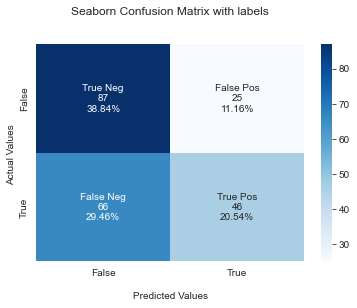

Classification Report: 
              precision    recall  f1-score   support

           0       0.57      0.78      0.66       112
           1       0.65      0.41      0.50       112

    accuracy                           0.59       224
   macro avg       0.61      0.59      0.58       224
weighted avg       0.61      0.59      0.58       224

Accuracy:  0.59375


In [81]:
final_result = confusion_matrix(y_test, pred_final)
group_counts = ["{0:0.0f}".format(value) for value in final_result.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     final_result.flatten()/np.sum(final_result)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(final_result, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


final_result1 = classification_report(y_test, pred_final)
print("Classification Report: ")
print(final_result1)

final_result2 = accuracy_score(y_test, pred_final)
print("Accuracy: ", final_result2)